In [28]:
import matplotlib.pyplot as plt
import networkx as nx

from src.SYMQCircuit import *
from src.Tools import *
from QAOATools import *

In [29]:
# Generating random graph 
n = 5
rng_seed = int(np.random.randint(0,2**32-1))
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
edge_list = generate_random_graph(nodes=n,weighted=True,w_min=1e-2,seed=rng_seed)

 # tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edge_list)


Best solution = [0 1 0 1 0] cost = -4.0244


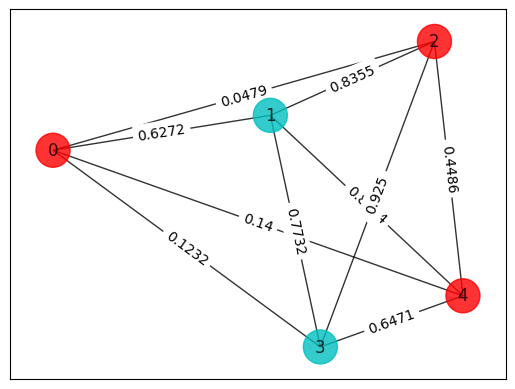

In [30]:
# Computing the weight dict from the random graph
w_dict = {}
for i, j, weight in edge_list:
    w_dict[(i,j)] = weight

# Calculating optimal partition and plotting
best_cost, best_perm = qubo_min_cost_partition(nr_nodes=n,Q_mat=get_qubo(size=n,edges=edge_list))
colors = ["r" if best_perm[i] == 0 else "c" for i in range(n)]
print("\nBest solution = " + str(best_perm) + " cost = " + str(best_cost))
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)


In [31]:
# Defining number of qubits in circuit
_N_QUBITS_ = 3

# Creating instance of circuit
my_circuit = SYMQCircuit(nr_qubits=_N_QUBITS_)

#Adding H to all qubits in circuit
for q in range(_N_QUBITS_):
    my_circuit.add_h(target_qubit=q)
    
# Adding miscellaneous gates to circuit 
my_circuit.add_cnot(target_qubit=2, control_qubit=0)
my_circuit.add_rz(target_qubit=1, angle=np.pi/2)
my_circuit.add_cry(target_qubit=2, control_qubit=1, angle=np.pi / 7)

# Retrieving state vector
state_vector = my_circuit.get_state_vector()

# Or just get probability distribution 
probs = my_circuit.get_state_probabilities()